<a href="https://colab.research.google.com/github/varshum12/DL-27-Nov-2025/blob/main/Binary_classification_DL_28th_nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df  =  pd.read_csv('train_loan.csv')

#### Basic data quality checks

In [5]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
df.duplicated().sum()

np.int64(0)

#  seperation  of  x and  y

In [9]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
x   =  df.drop(['id' ,  'loan_status'] , axis  =  1)
y  =  df['loan_status']

In [23]:
a = y.value_counts()

<Axes: xlabel='loan_status'>

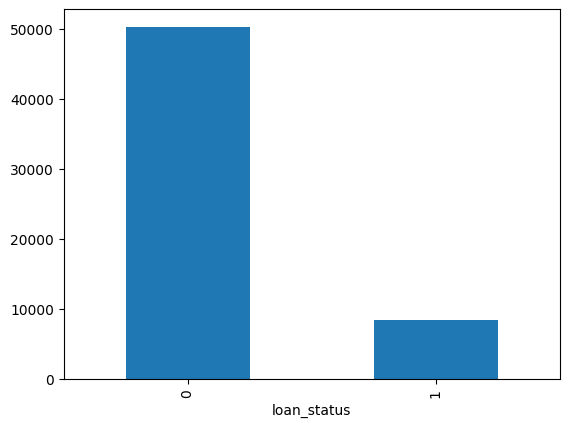

In [24]:
a.plot(kind  = 'bar')

### seperate  cat and  num data

In [11]:
cat  =  x.columns[x.dtypes  == 'object']
num = x.columns[x.dtypes  != 'object']

In [12]:
print(cat)
print()
print(num)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')


### create pipeline

In [13]:
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler ,  OrdinalEncoder
from sklearn.compose  import ColumnTransformer
from sklearn.impute import  SimpleImputer

In [14]:
num_pipline  =  Pipeline(steps  = [('imputer' , SimpleImputer(strategy='mean')) ,
                                   ('scaler' , StandardScaler())])

cat_pipeline  =  Pipeline(steps  = [('imputer' , SimpleImputer(strategy='most_frequent')) ,
                                    ('encoder' ,  OrdinalEncoder())])

In [15]:
pre  =  ColumnTransformer([('num' ,  num_pipline , num)   ,
                           ('cat' , cat_pipeline , cat)] )

In [16]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object'))])

##apply to data

In [17]:
x_scaled  =  pre.fit_transform(x)
x_scaled  =  pd.DataFrame(x_scaled  ,  columns   =  x.columns)

In [19]:
x.shape

(58645, 11)

In [18]:
x_scaled.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,3.0,1.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,2.0,3.0,2.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,2.0,4.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,3.0,5.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,3.0,3.0,0.0,0.0


### train  test  split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train ,  x_test  ,  y_train  ,  y_test  =  train_test_split(x_scaled  , y  ,
                                                              test_size  = 0.2  ,
                                                              random_state  = 45)

In [25]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(46916, 11) (46916,)
(11729, 11) (11729,)


#### create  nn architecture[link text](https:// [link text](https://))

In [26]:
import keras
from keras.models  import Sequential
from keras.layers  import Dense  ,  Dropout

In [28]:
nn  =  Sequential()

## add input  layer
nn.add(Dense(units  =  400,  input_dim  = x_train.shape[1] , kernel_initializer= "he_uniform" ))
nn.add(Dropout(0.3))

## add  hidden layers
nn.add(Dense(units  =  512,    kernel_initializer= "he_uniform" ,  activation='relu' ))
nn.add(Dropout(0.3))

nn.add(Dense(units  =  512,    kernel_initializer= "he_uniform" ,  activation='relu' ))
nn.add(Dropout(0.4))

nn.add(Dense(units  =  512,    kernel_initializer= "he_uniform" ,  activation='relu' ))
nn.add(Dropout(0.5))


# add  output layer
nn.add(Dense(units  =  1,    kernel_initializer= "glorot_uniform" ,  activation='sigmoid' ))


In [29]:
## model compile
nn.compile(optimizer =  'adam' ,  loss  = 'binary_crossentropy',
                                  metrics  = ['accuracy'])

In [30]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 735,937 (2.81 MB)

 Trainable params: 735,937 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from  keras.callbacks import EarlyStopping
er  =  EarlyStopping(monitor  = 'val_loss' , patience  =5 )

In [50]:
hist  =  nn.fit(x_train  ,  y_train  ,
                validation_split =  0.2  , callbacks  =  er ,
                batch_size  = 512 ,  epochs  =  100 )

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9226 - loss: 0.2265 - val_accuracy: 0.9286 - val_loss: 0.2193
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9229 - loss: 0.2219 - val_accuracy: 0.9327 - val_loss: 0.2256
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9247 - loss: 0.2224 - val_accuracy: 0.9334 - val_loss: 0.2241
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9214 - loss: 0.2263 - val_accuracy: 0.9319 - val_loss: 0.2201
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9241 - loss: 0.2212 - val_accuracy: 0.9337 - val_loss: 0.2135
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9237 - loss: 0.2256 - val_accuracy: 0.9332 - val_loss: 0.2207
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9239 - loss: 0.2208 - val_accuracy: 0.9337 - val_loss: 0.2181
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.2179 - val_accuracy: 0.9300 -

## plot

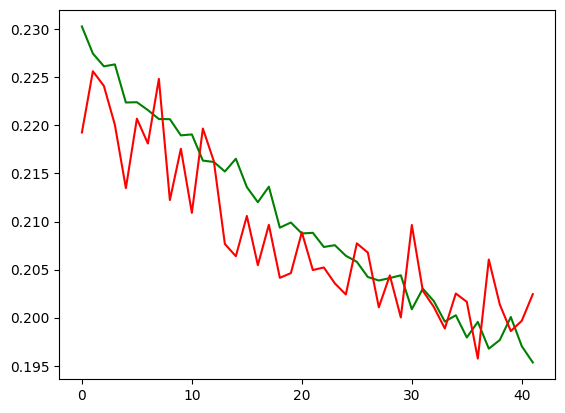

In [51]:
plt.plot(hist.history['loss'], c = 'green')
plt.plot(hist.history['val_loss'], c = 'red')

In [52]:
nn.evaluate(x_train  ,  y_train)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9448 - loss: 0.1880


[0.19054080545902252, 0.9446883797645569]

In [53]:
nn.evaluate(x_test,  y_test)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9410 - loss: 0.2007


[0.19833087921142578, 0.9424503445625305]

## model  evaluation  on remaining parameters


In [36]:
from  sklearn.metrics import classification_report ,  confusion_matrix


### Training evaluation

In [54]:
train_pred_prob  =  nn.predict(x_train)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [55]:
train_pred_prob

array([[0.1480905 ],
       [0.35368016],
       [0.05361851],
       ...,
       [0.03004619],
       [0.06406052],
       [0.08805595]], dtype=float32)

In [56]:
train_pred  =  []
for i in train_pred_prob:
  if  i >=0.5:
    train_pred.append(1)
  else:
    train_pred.append(0)

In [57]:
train_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [58]:
print(classification_report(y_train  ,  train_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     40177
           1       0.94      0.66      0.77      6739

    accuracy                           0.94     46916
   macro avg       0.94      0.82      0.87     46916
weighted avg       0.94      0.94      0.94     46916



In [60]:
confusion_matrix(y_train  ,  train_pred)

array([[39905,   272],
       [ 2323,  4416]])

In [61]:
x_train.shape

(46916, 11)

### testing evaluation

In [62]:
test_pred_prob  =  nn.predict(x_test)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
test_pred  =  []
for i in test_pred_prob:
  if  i >=0.5:
    test_pred.append(1)
  else:
    test_pred.append(0)

In [64]:
print(classification_report(y_test  ,  test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10118
           1       0.92      0.63      0.75      1611

    accuracy                           0.94     11729
   macro avg       0.93      0.81      0.86     11729
weighted avg       0.94      0.94      0.94     11729



In [65]:
confusion_matrix(y_test  ,  test_pred)

array([[10032,    86],
       [  589,  1022]])

In [66]:
589+86

675

### unseen  file  prediction

In [67]:
sample  =  pd.read_csv('test_loan.csv')

In [68]:
sample.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [69]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object'))])

In [70]:
sample_scaled  = pre.fit_transform(sample)

In [71]:
prob =  nn.predict(sample_scaled)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [73]:
prob

array([[0.9853461 ],
       [0.05337236],
       [0.35428527],
       ...,
       [0.0611592 ],
       [0.2721728 ],
       [0.94218004]], dtype=float32)

In [74]:
pred  = []
for i in  prob  :
  if  i  >=0.5:
    pred.append(1)
  else:
    pred.append(0)

In [75]:
pred

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
